In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
df = pd.read_csv("vgg_5y_activation.csv.gz", index_col=0)
df

,0,1,2,3,4,5,6,7,8,9,...,502,503,504,505,506,507,508,509,510,511
0,0.142803,0.400475,0.134664,0.075232,0.161829,0.335772,0.034391,0.178221,0.228338,0.079080,...,0.218878,0.476947,0.042160,0.302460,0.281130,0.048943,0.092393,0.308245,0.176064,0.020658
1,0.153040,0.369468,0.343546,0.159964,0.177989,0.296884,0.026182,0.111398,0.232975,0.071310,...,0.136407,0.148069,0.051981,0.146548,0.241734,0.123167,0.069215,0.228878,0.172204,0.022260
2,0.105058,0.218708,0.427899,0.148000,0.038263,0.384796,0.042876,0.116903,0.126105,0.052608,...,0.233396,0.153381,0.012768,0.152117,0.134829,0.057846,0.071152,0.054373,0.067675,0.016740
3,0.126020,0.440626,0.223603,0.133866,0.113369,0.259057,0.200247,0.128830,0.304532,0.143829,...,0.191846,0.366552,0.021012,0.415277,0.288085,0.273792,0.198327,0.299434,0.222212,0.117026
4,0.158089,0.062936,0.228385,0.224262,0.195025,0.133689,0.054723,0.104017,0.008573,0.202741,...,0.084686,0.025523,0.125536,0.059776,0.009763,0.124605,0.063370,0.249394,0.058870,0.029997
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
50247,0.024017,0.529761,0.392485,0.132199,0.021490,0.708420,0.004376,0.071726,0.014480,0.544205,...,0.359036,0.178483,0.105762,0.381127,0.000000,0.587985,0.079742,0.005765,0.006367,0.017379
50248,0.093362,0.533998,0.405788,0.156721,0.002338,0.579458,0.044787,0.176960,0.009811,0.499926,...,0.436967,0.315911,0.208208,0.438174,0.037188,0.589422,0.043713,0.023868,0.026106,0.019453
50249,0.014703,0.549547,0.378694,0.142741,0.018892,0.649889,0.018734,0.098782,0.029179,0.936829,...,0.336168,0.285051,0.175838,0.394663,0.037916,0.547642,0.040543,0.025586,0.012245,0.010893
50250,0.130718,0.577925,0.353213,0.089060,0.038444,0.597074,0.022201,0.076431,0.010245,0.433426,...,0.380023,0.363626,0.118584,0.550806,0.023213,0.756092,0.035423,0.017822,0.040728,0.006346


신경망 출력값의 범위

<AxesSubplot:ylabel='Density'>

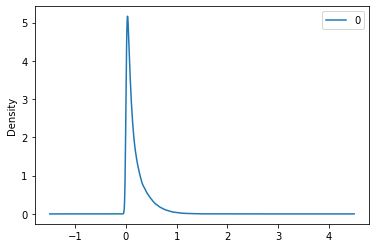

In [3]:
flatten = pd.DataFrame(df.to_numpy().reshape(-1))
flatten.sample(frac=0.01, random_state=1106).plot.kde()

In [4]:
flatten.describe()

,0
count,2.572902e+07
mean,1.856991e-01
std,2.032684e-01
min,0.000000e+00
25%,4.580271e-02
50%,1.127506e-01
75%,2.544299e-01
max,4.511184e+00


바이클러스터링 군집 수 결정

In [5]:
from sklearn.cluster import MiniBatchKMeans

In [6]:
clust = MiniBatchKMeans(
    n_clusters=30, batch_size=100, verbose=0, random_state=1106,
).fit(df)

clust.inertia_

249567.31977586384

In [11]:
inertia_dict = {
    i: MiniBatchKMeans(n_clusters=i, random_state=1106,).fit(df).inertia_
    for i in range(2, 31)
}

In [12]:
inertia_dict

{2: 546178.1986069791,
 3: 464805.80959747697,
 4: 412207.11184456217,
 5: 383727.88962536864,
 6: 381051.23471486126,
 7: 363963.0413326293,
 8: 336105.897181764,
 9: 335850.23782929545,
 10: 320455.41851875593,
 11: 317763.65472776874,
 12: 316941.13864937006,
 13: 297984.5873021456,
 14: 295283.74958088406,
 15: 301581.77049479476,
 16: 287771.2844192811,
 17: 283543.59737378487,
 18: 280403.99681494106,
 19: 277395.08939560945,
 20: 274496.4316501604,
 21: 267349.84685781586,
 22: 264978.7881748365,
 23: 262641.5707076779,
 24: 261800.3182810875,
 25: 261318.0972012315,
 26: 257632.69368961337,
 27: 255627.06538646604,
 28: 253206.94315814826,
 29: 251818.27031600522,
 30: 249567.31977586384}

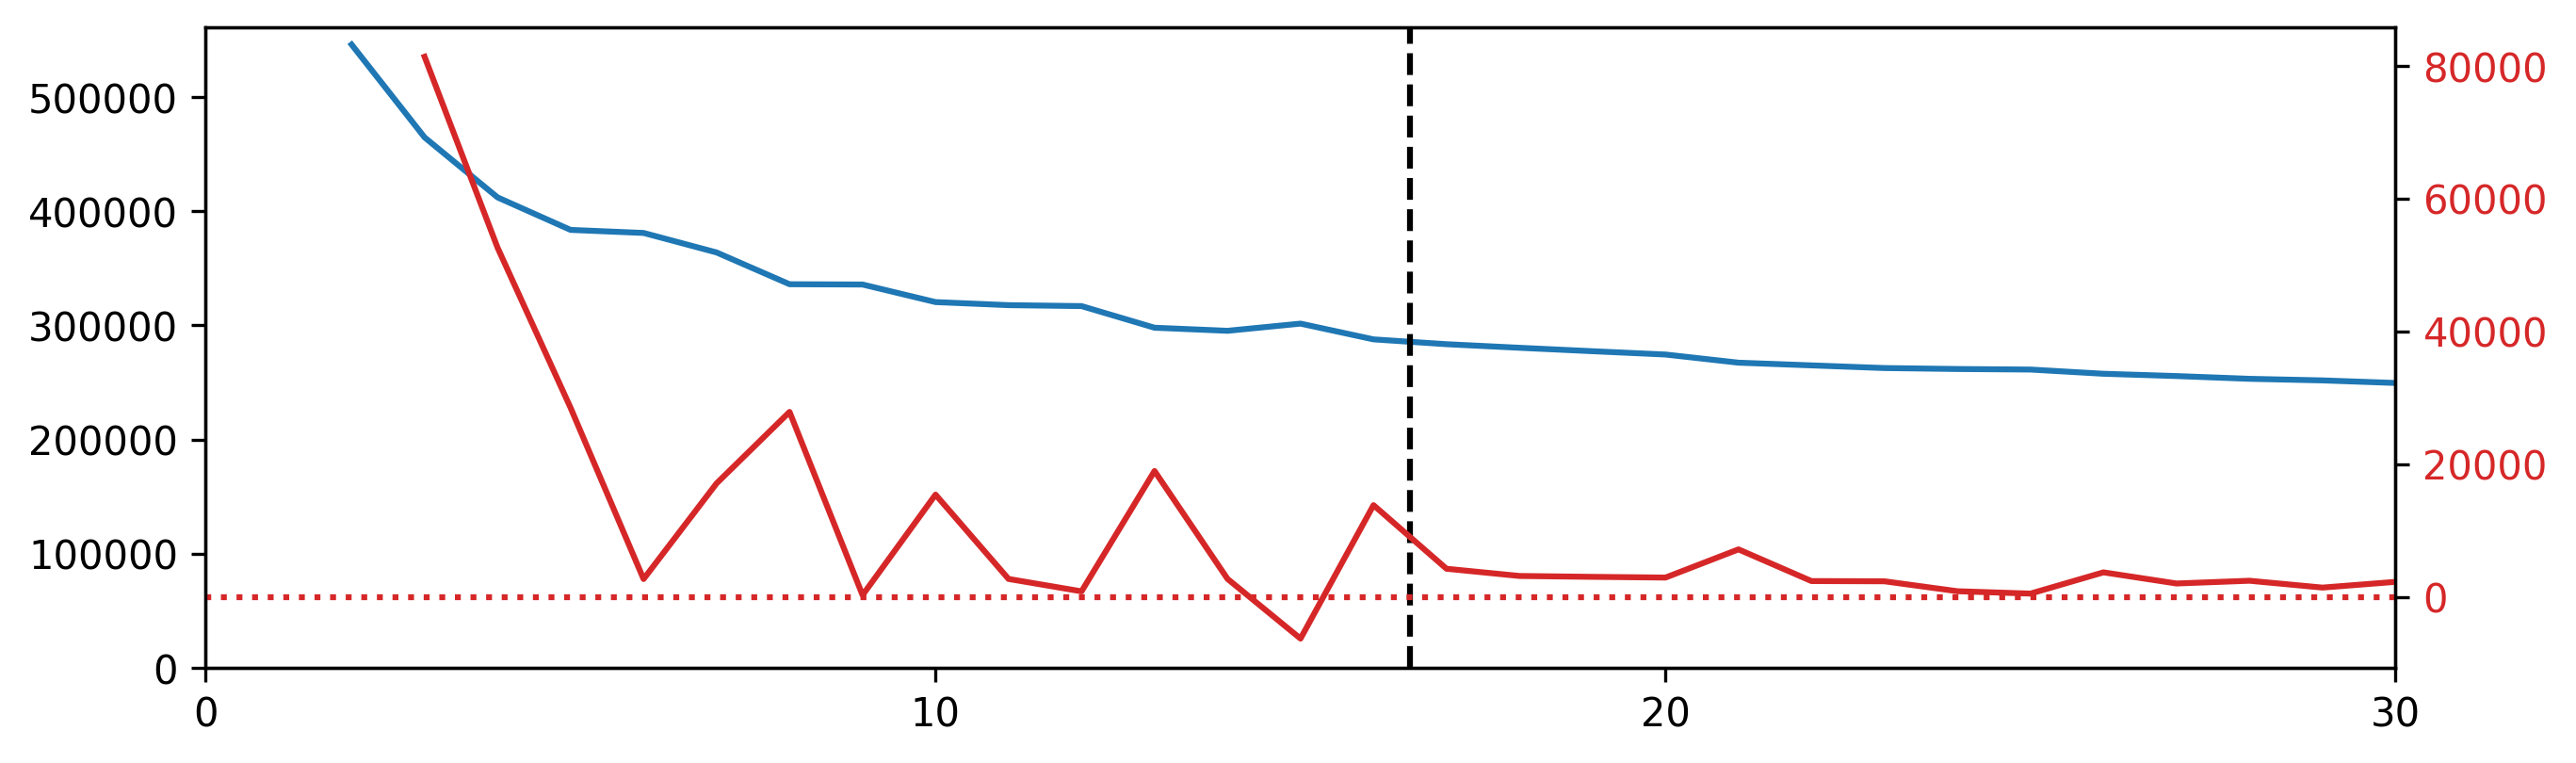

In [112]:
fig = plt.figure(figsize=(10, 3), dpi=300)

ax = pd.Series(inertia_dict).plot()
ax.set_xlim(0, 30)
ax.set_ylim(0)

ax2 = ax.twinx()
(pd.Series(inertia_dict).diff() * (-1)).plot(c="tab:red", ax=ax2)
# ax2.set_ylim(0)
ax2.axhline(0, c="tab:red", ls=":")
ax2.tick_params(axis="y", labelcolor="tab:red")

n_clusters = 16  # <-------------------------

[ax.axvline(n + 0.5, c="k", ls="--") for n in [n_clusters]]
ax.set_xticks(list(range(0, 30 + 1, 10)))

plt.show()
fig.savefig("biclust_n.png", bbox_inches="tight", pad_inches=0)
fig.savefig("biclust_n.pdf", bbox_inches="tight", pad_inches=0)

In [14]:
inertia_dict_col = {
    i: MiniBatchKMeans(n_clusters=i, random_state=1106,).fit(df.T).inertia_
    for i in range(2, 31)
}

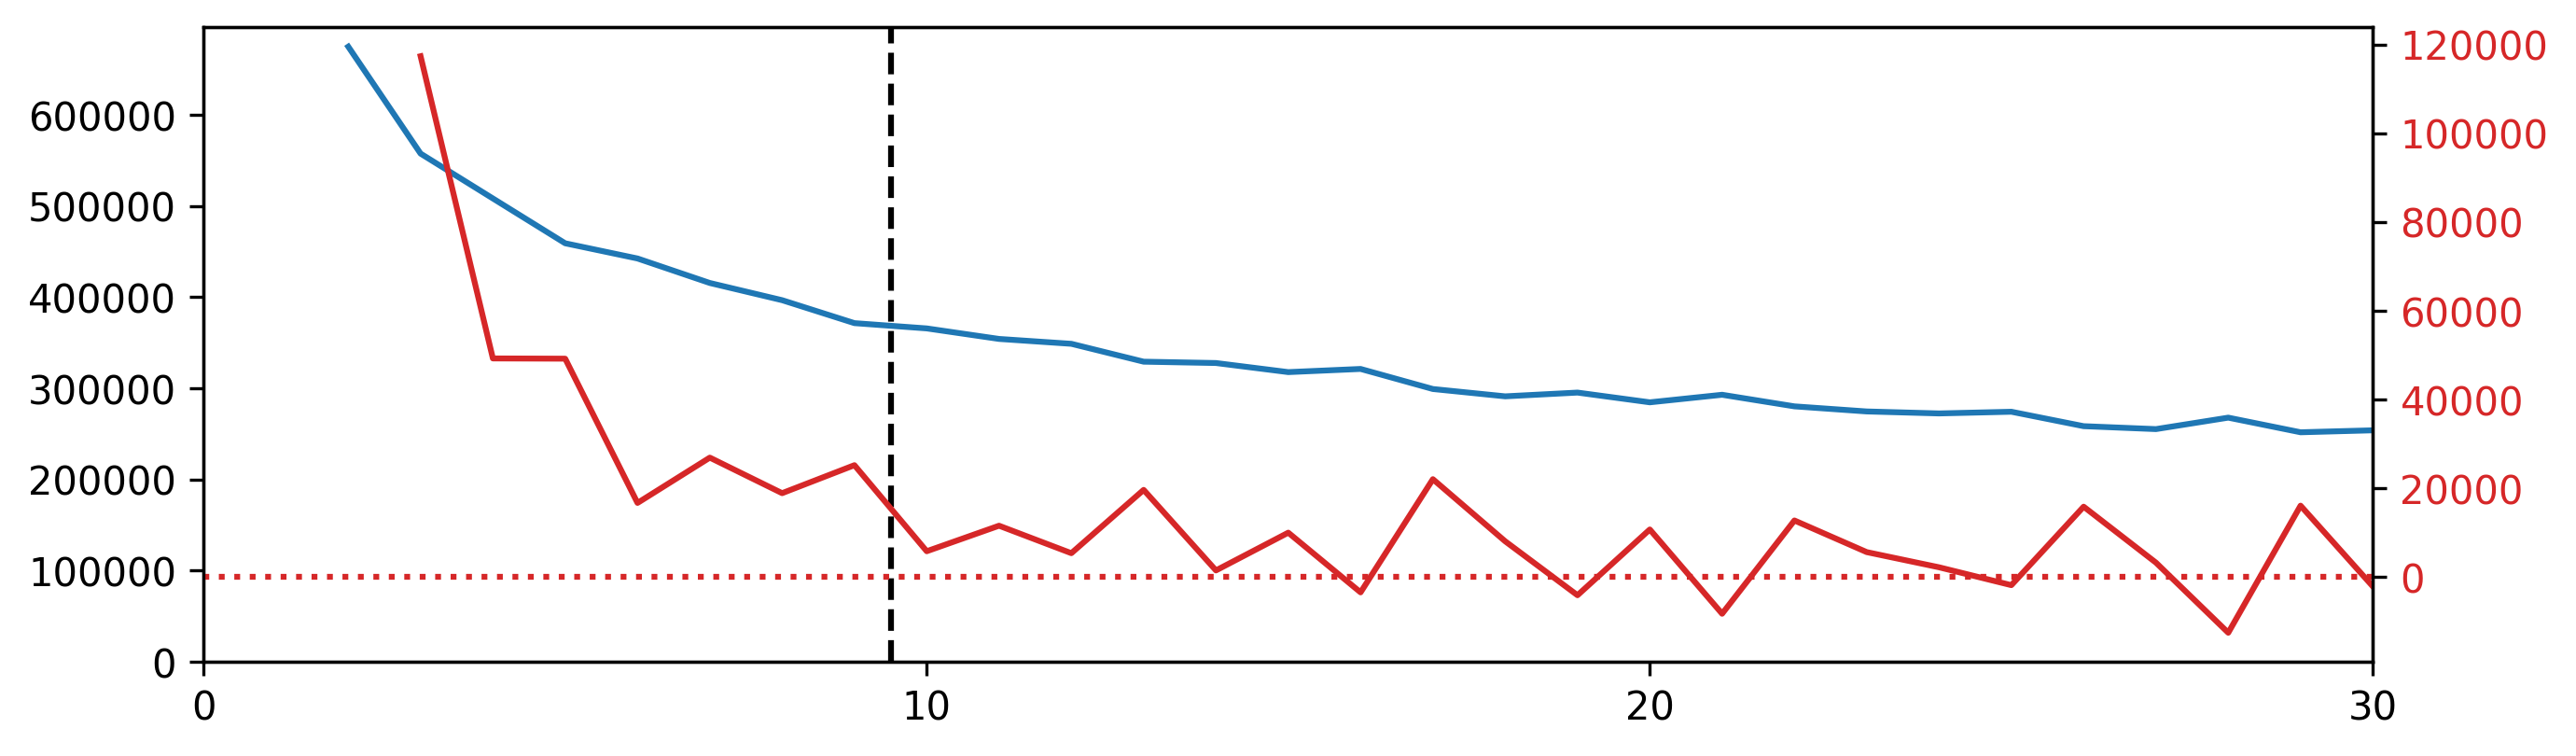

In [115]:
fig = plt.figure(figsize=(10, 3), dpi=300)

ax = pd.Series(inertia_dict_col).plot()
ax.set_xlim(0, 30)
ax.set_ylim(0)

ax2 = ax.twinx()
(pd.Series(inertia_dict_col).diff() * (-1)).plot(c="tab:red", ax=ax2)
# ax2.set_ylim(0)
ax2.axhline(0, c="tab:red", ls=":")
ax2.tick_params(axis="y", labelcolor="tab:red")

ns = [9]  # <-------------------------

[ax.axvline(n + 0.5, c="k", ls="--") for n in ns]
ax.set_xticks(list(range(0, 30 + 1, 10)))

plt.show()
fig.savefig("biclust_n_col.png", bbox_inches="tight", pad_inches=0)
fig.savefig("biclust_n_col.pdf", bbox_inches="tight", pad_inches=0)

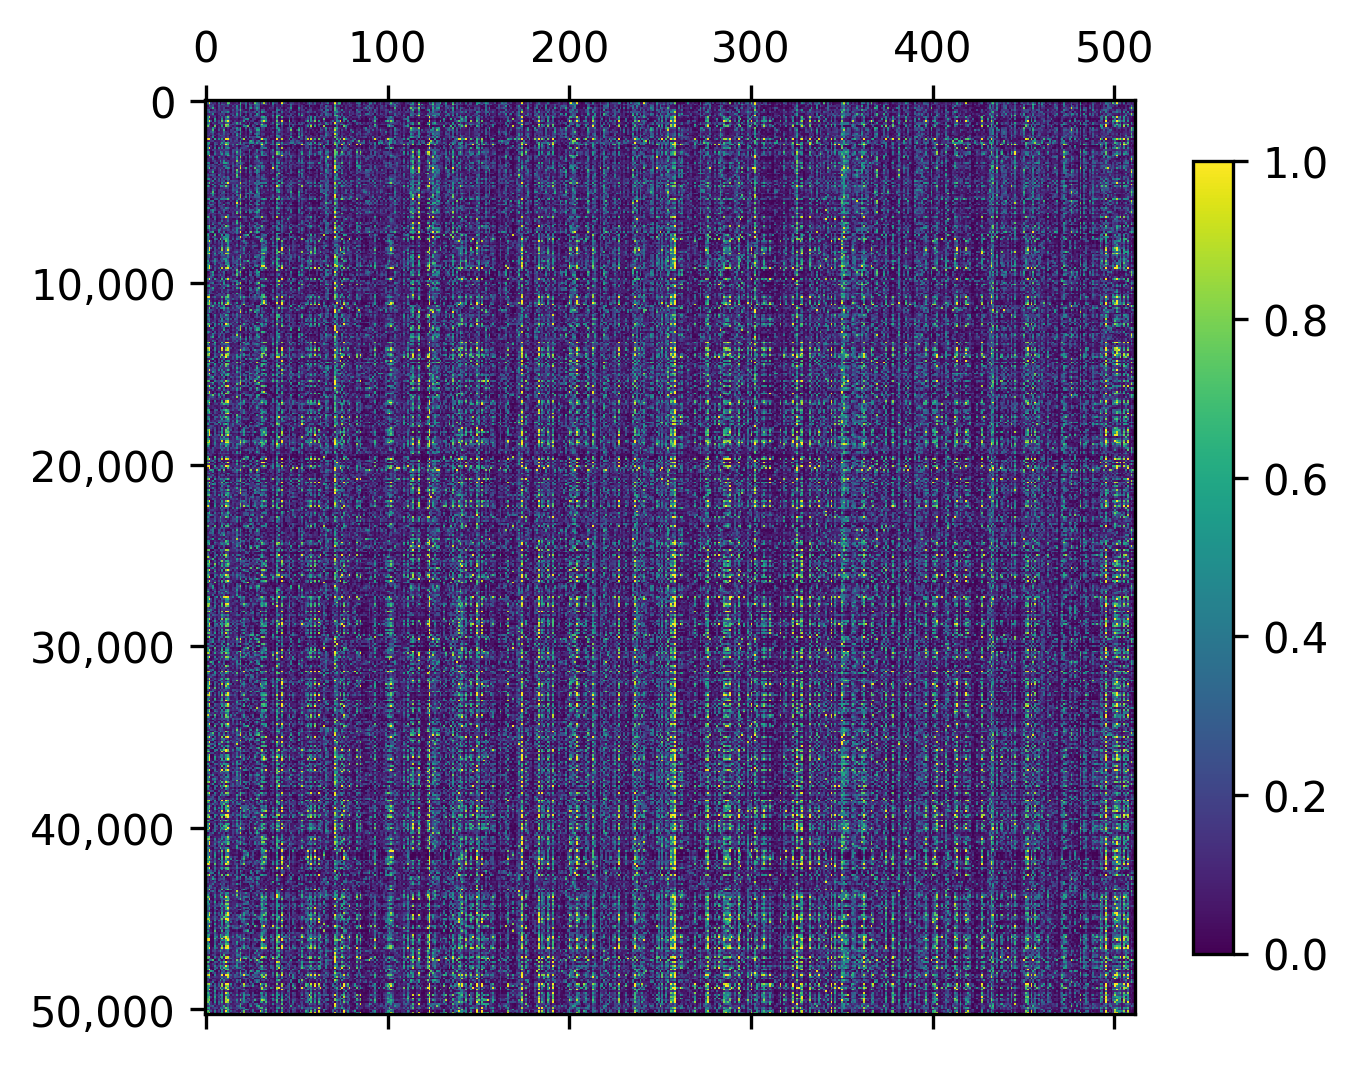

In [119]:
import matplotlib.colors as colors

fig = plt.figure(figsize=(5, 7), dpi=300)
ax = fig.gca()

im = ax.matshow(df[::100], vmin=0, vmax=1, cmap="viridis",)

ax.set_yticks(range(0, 500 + 1, 100))
ax.set_yticklabels([f"{t:,}" for t in range(0, 50000 + 1, 10000)])

fig.colorbar(im, shrink=0.5)

plt.show()
fig.savefig("biclust_before.png", bbox_inches="tight", pad_inches=0)
fig.savefig("biclust_before.pdf", bbox_inches="tight", pad_inches=0)

In [22]:
df_refined = pd.read_csv("fp_refined.csv")
df_refined

,id_after,Path,index,APT_ID,Date,year,norm_year,yyyymm,N_Housings,Max_Floors,...,sido_cluster_code,sido_sgg_name,FP_ID,Area,norm_log_area,area_85,Entrance,Rooms,Baths,N_Units
0,8928_160,/data/fp_img_processed/8928_160.png,1,8928,2004-06-01T00:00:00Z,2004,0.70,200406,212,22,...,0,서울시 강남구,160,134.30,1.313282,False,계단식,4,2,84
1,8928_183,/data/fp_img_processed/8928_183.png,2,8928,2004-06-01T00:00:00Z,2004,0.70,200406,212,22,...,0,서울시 강남구,183,153.80,1.702528,False,계단식,4,2,44
2,8928_201A,/data/fp_img_processed/8928_201A.png,3,8928,2004-06-01T00:00:00Z,2004,0.70,200406,212,22,...,0,서울시 강남구,201A,170.32,1.995448,False,계단식,4,2,42
3,8928_204B,/data/fp_img_processed/8928_204B.png,4,8928,2004-06-01T00:00:00Z,2004,0.70,200406,212,22,...,0,서울시 강남구,204B,168.42,1.963240,False,계단식,4,2,42
4,960_35,/data/fp_img_processed/960_35.png,5,960,1982-11-01T00:00:00Z,1982,0.26,198211,5040,5,...,0,서울시 강남구,35,35.64,-2.495452,False,계단식,2,1,530
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
50535,115454_21D,/data/fp_img_processed/115454_21D.png,50577,115454,2017-03-01T00:00:00Z,2017,0.96,201703,72,4,...,8,제주도 제주시,21D,14.50,-5.077429,False,계단식,2,1,20
50536,115454_34E,/data/fp_img_processed/115454_34E.png,50578,115454,2017-03-01T00:00:00Z,2017,0.96,201703,72,4,...,8,제주도 제주시,34E,21.57,-3.937185,False,계단식,2,1,4
50537,115454_36B,/data/fp_img_processed/115454_36B.png,50579,115454,2017-03-01T00:00:00Z,2017,0.96,201703,72,4,...,8,제주도 제주시,36B,24.86,-3.529623,False,계단식,3,2,16
50538,115454_37A,/data/fp_img_processed/115454_37A.png,50580,115454,2017-03-01T00:00:00Z,2017,0.96,201703,72,4,...,8,제주도 제주시,37A,25.67,-3.437569,False,계단식,3,2,24


In [23]:
df_vgg = pd.read_csv("vgg_5y_prediction.csv")

In [24]:
df_clust = df_vgg.join(
    df_refined.set_index("id_after")[
        ["year", "sido_cluster_code", "Area", "Rooms", "Baths"]
    ],
    on="ID",
)
df_clust

,Unnamed: 0,ID,true,prediction,year,sido_cluster_code,Area,Rooms,Baths
0,0,8928_160,6,6,2004,0,134.30,4,2
1,1,8928_183,6,6,2004,0,153.80,4,2
2,2,8928_201A,6,7,2004,0,170.32,4,2
3,3,8928_204B,6,6,2004,0,168.42,4,2
4,4,960_35,2,4,1982,0,35.64,2,1
...,...,...,...,...,...,...,...,...,...
50247,50247,115454_21D,9,9,2017,8,14.50,2,1
50248,50248,115454_34E,9,9,2017,8,21.57,2,1
50249,50249,115454_36B,9,9,2017,8,24.86,3,2
50250,50250,115454_37A,9,9,2017,8,25.67,3,2


In [32]:
from sklearn.cluster import SpectralBiclustering

n_clusters = (16, 9)
model = SpectralBiclustering(n_clusters=n_clusters, random_state=1106, n_jobs=6).fit(df)

df_clust["cluster"] = model.row_labels_
order = df_clust.groupby("cluster")["year"].mean().argsort().values
rank = order.argsort()
df_clust["cluster"] = rank[df_clust.cluster]

df_clust.groupby("cluster").year.mean()

cluster
0     1991.893809
1     1994.290058
2     1995.305464
3     1998.029519
4     2000.725419
5     2002.857296
6     2005.801027
7     2005.868449
8     2007.120149
9     2007.405849
10    2009.000616
11    2011.140625
12    2011.326656
13    2012.765227
14    2014.277629
15    2015.199419
Name: year, dtype: float64

(0.0, 0.298958942980787)

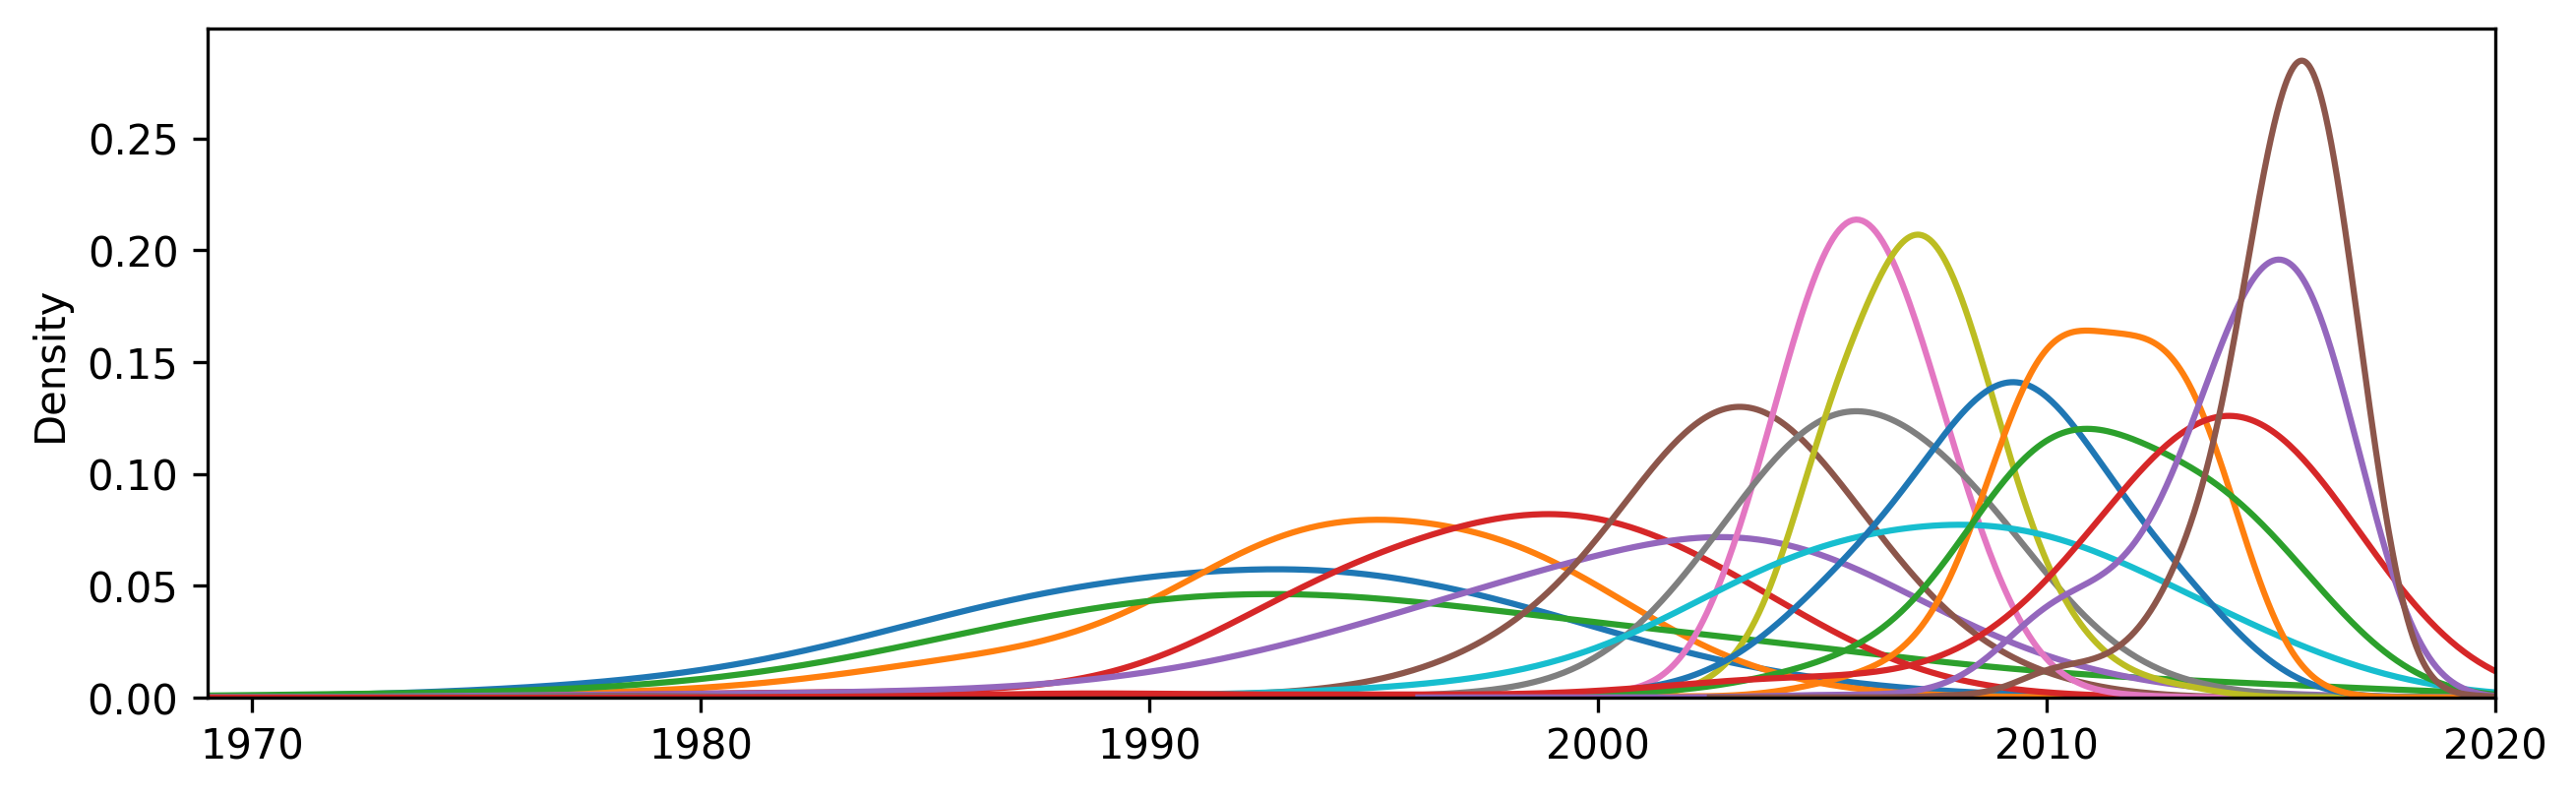

In [41]:
fig = plt.figure(figsize=(10, 3), dpi=300)

axs = df_clust.groupby("cluster")["year"].plot.kde(bw_method=0.5)
axs[0].set_xlim(1969, 2020)
axs[0].set_ylim(0)

# plt.legend()

In [72]:
df_mean = (
    df.groupby(df_clust["cluster"]).mean().groupby(model.column_labels_, axis=1).mean()
)
df_mean

,0,1,2,3,4,5,6,7,8
cluster,,,,,,,,,
0,0.309348,0.086447,0.327199,0.129222,0.100290,0.100215,0.107568,0.125228,0.131360
1,0.425896,0.069489,0.461778,0.094116,0.057739,0.105421,0.071675,0.159351,0.147752
2,0.143489,0.117915,0.171324,0.176701,0.163154,0.073979,0.156857,0.081318,0.097383
3,0.399535,0.098888,0.308678,0.075145,0.066782,0.118315,0.115388,0.226606,0.112964
4,0.304010,0.148627,0.194668,0.094859,0.136452,0.116756,0.220909,0.196817,0.095602
5,0.412094,0.173498,0.198605,0.059127,0.116601,0.168764,0.277908,0.404670,0.092995
6,0.341651,0.262248,0.110203,0.057994,0.198271,0.294119,0.478475,0.623533,0.072619
7,0.366638,0.254065,0.131084,0.077250,0.239953,0.175182,0.469517,0.371796,0.085147
8,0.316995,0.369674,0.078186,0.091735,0.366898,0.275321,0.706553,0.591064,0.072694


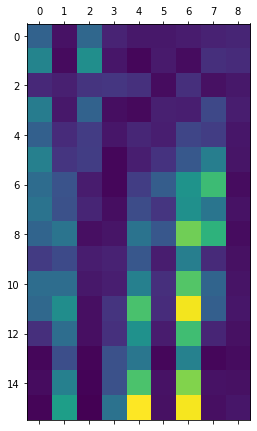

In [34]:
plt.matshow(df_mean)

In [35]:
weighted_avg_col = np.asarray(
    [
        np.average(np.arange(df_mean.shape[0]), weights=df_mean[i])
        for i in np.arange(df_mean.shape[1])
    ]
)
weighted_avg_col

array([ 6.06217153,  9.63120242,  4.65726615,  9.29064942, 10.49321492,
        7.26434268,  9.86850797,  7.03035664,  6.84577312])

In [68]:
df.mean().groupby(model.column_labels_).mean()

0    0.273599
1    0.232845
2    0.174790
3    0.135113
4    0.282637
5    0.130087
6    0.398528
7    0.227854
8    0.096670
dtype: float64

In [95]:
order_col = weighted_avg_col.argsort()
# order_col = (df.mean().groupby(model.column_labels_).mean().to_numpy() * -1).argsort()
rank_col = order_col.argsort()
rank_col

array([1, 6, 0, 5, 8, 4, 7, 3, 2])

In [96]:
df.quantile(0.1).quantile(0.1), df.quantile(0.5).quantile(0.5), df.quantile(
    0.9
).quantile(0.9)

(0.007723595885000001, 0.11310501375, 0.6900655711000001)

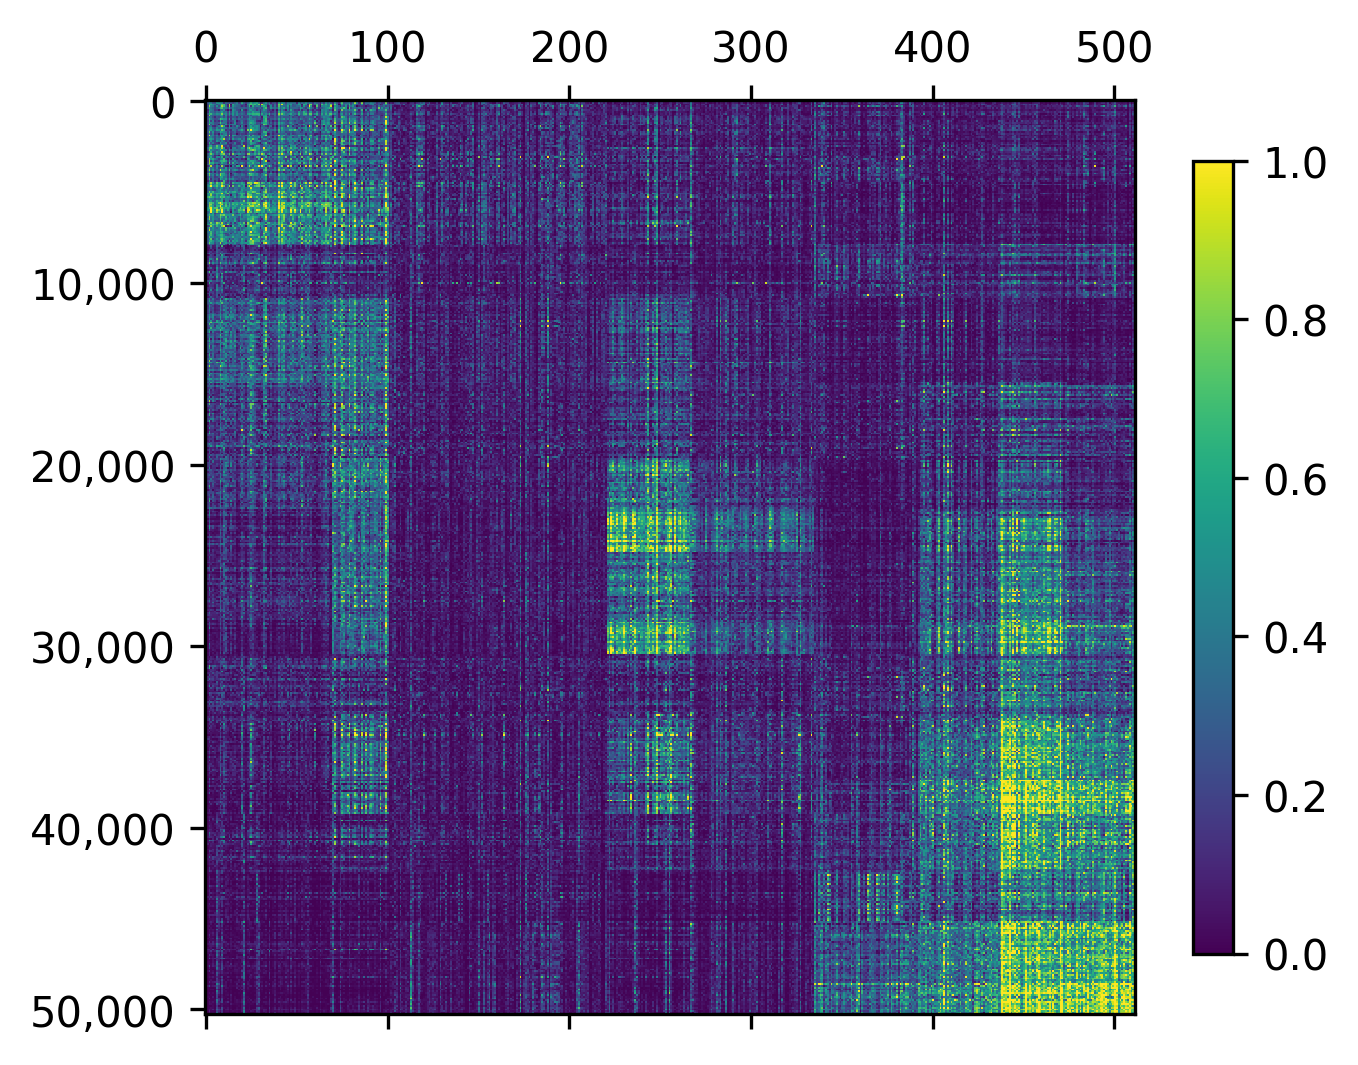

In [117]:
ordered = df.iloc[
    np.argsort(rank[model.row_labels_]), np.argsort(rank_col[model.column_labels_])
]

fig = plt.figure(figsize=(5, 7), dpi=300)
ax = fig.gca()

im = ax.matshow(ordered[::100], vmin=0, vmax=1, cmap="viridis")

ax.set_yticks(range(0, 500 + 1, 100))
ax.set_yticklabels([f"{t:,}" for t in range(0, 50000 + 1, 10000)])

fig.colorbar(im, shrink=0.5)

plt.show()
fig.savefig("biclust_after.png", bbox_inches="tight", pad_inches=0)
fig.savefig("biclust_after.pdf", bbox_inches="tight", pad_inches=0)

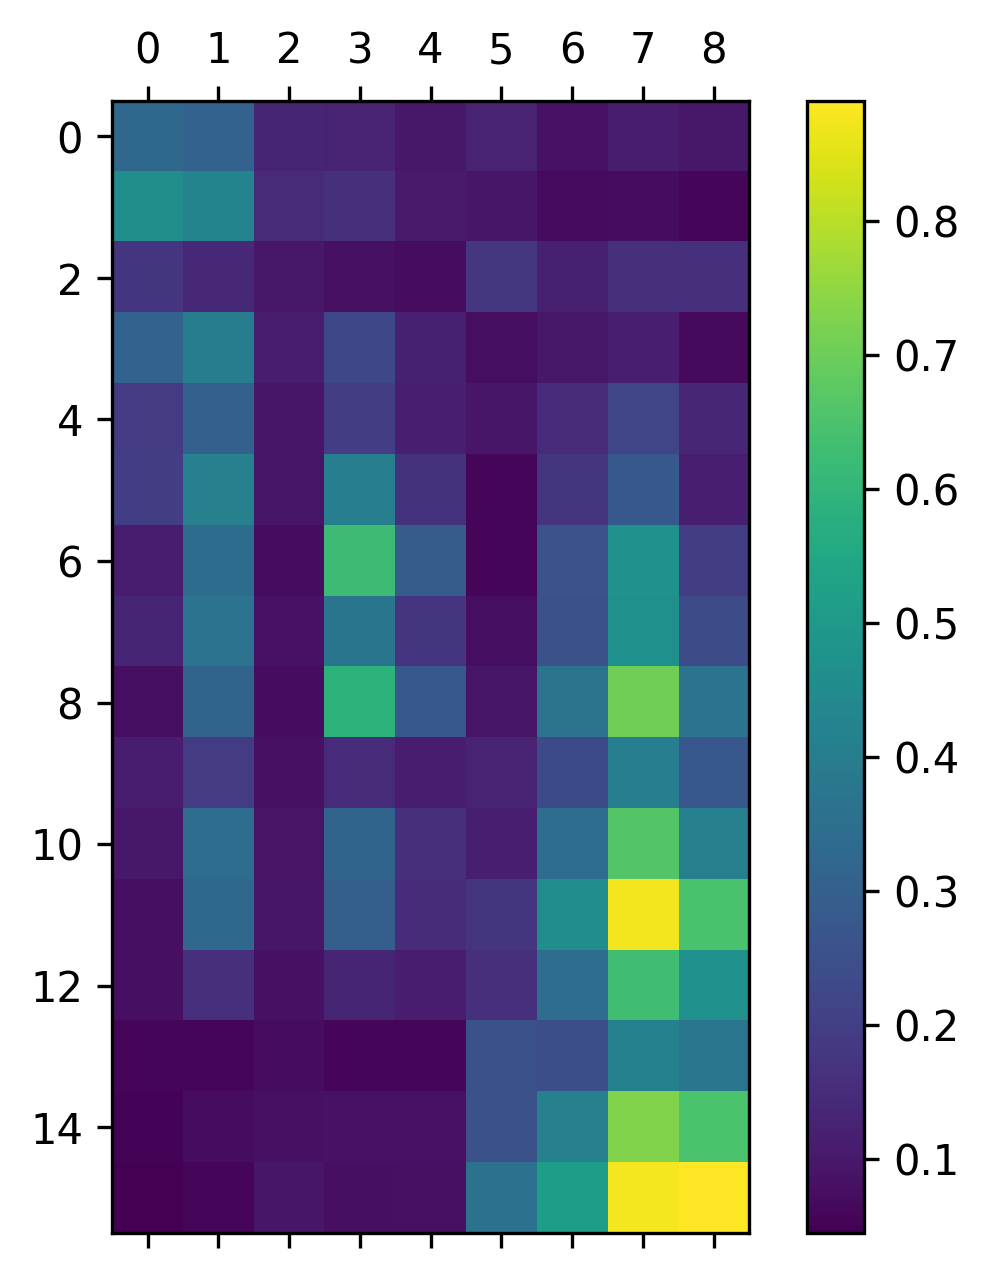

In [118]:
df_mean = (
    df.groupby(df_clust["cluster"])
    .mean()
    .groupby(rank_col[model.column_labels_], axis=1)
    .mean()
)

fig = plt.figure(figsize=(5, 5), dpi=300)
ax = fig.gca()

im = ax.matshow(df_mean)
fig.colorbar(im)

plt.show()
fig.savefig("biclust_mean.png", bbox_inches="tight", pad_inches=0)
fig.savefig("biclust_mean.pdf", bbox_inches="tight", pad_inches=0)

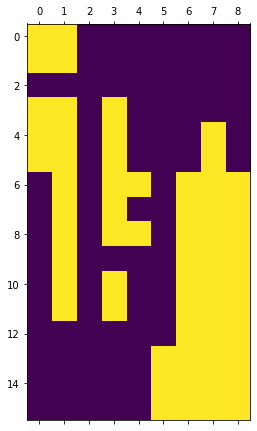

In [99]:
plt.matshow(df_mean >= df.mean().mean())

In [109]:
rank_col[model.column_labels_]

array([0, 7, 7, 2, 0, 6, 4, 2, 3, 8, 4, 7, 7, 5, 5, 4, 2, 1, 4, 1, 5, 8,
       5, 5, 1, 0, 5, 2, 0, 0, 6, 7, 6, 8, 2, 2, 4, 4, 2, 6, 3, 2, 8, 4,
       4, 2, 6, 0, 5, 4, 2, 0, 4, 3, 4, 5, 8, 3, 8, 4, 8, 4, 8, 3, 2, 5,
       1, 1, 2, 2, 5, 1, 6, 2, 6, 3, 8, 5, 6, 3, 2, 2, 5, 3, 2, 3, 4, 2,
       0, 0, 0, 2, 2, 6, 2, 4, 2, 2, 4, 2, 8, 8, 8, 5, 0, 4, 2, 2, 2, 3,
       2, 6, 2, 0, 3, 2, 2, 1, 4, 2, 2, 4, 3, 7, 2, 0, 4, 0, 0, 6, 2, 5,
       1, 0, 1, 5, 1, 5, 0, 7, 6, 8, 5, 8, 2, 1, 6, 3, 2, 8, 4, 2, 8, 3,
       0, 4, 0, 6, 6, 4, 2, 0, 4, 2, 0, 1, 8, 2, 2, 5, 2, 2, 2, 5, 7, 2,
       3, 0, 5, 2, 2, 2, 0, 7, 2, 6, 5, 0, 7, 3, 2, 7, 0, 2, 4, 0, 2, 2,
       0, 5, 7, 5, 0, 0, 7, 8, 4, 4, 5, 6, 0, 0, 2, 8, 2, 2, 2, 5, 5, 1,
       0, 2, 6, 5, 4, 4, 2, 7, 0, 4, 2, 6, 2, 2, 2, 1, 8, 5, 6, 1, 6, 4,
       2, 2, 2, 0, 1, 5, 3, 6, 0, 6, 2, 6, 0, 0, 7, 3, 7, 4, 0, 3, 3, 2,
       2, 4, 5, 2, 5, 6, 2, 4, 1, 2, 0, 8, 7, 0, 4, 2, 3, 5, 3, 0, 2, 7,
       8, 8, 7, 3, 4, 5, 1, 7, 5, 0, 4, 2, 6, 5, 8,

In [108]:
np.savetxt("biclust_col.txt", rank_col[model.column_labels_], "%.u")

In [111]:
df_clust.to_csv("biclust.csv")

In [128]:
pd.crosstab(df_clust.cluster, df_clust.Rooms)

Rooms,1,2,3,4,5,6,7
cluster,,,,,,,
0,34,1284,2530,459,109,10,0
1,0,91,1981,1222,121,5,0
2,222,1007,1586,172,46,5,0
3,0,208,3227,1017,211,12,0
4,108,589,2487,714,191,28,2
5,0,49,1709,851,180,6,1
6,0,6,1529,739,60,3,0
7,12,51,2434,1071,164,7,1
8,1,2,1497,358,22,1,0


In [129]:
pd.crosstab(df_clust.cluster, df_clust.Rooms, normalize="index")

Rooms,1,2,3,4,5,6,7
cluster,,,,,,,
0,0.007682,0.290104,0.571622,0.103705,0.024627,0.002259,0.000000
1,0.000000,0.026608,0.579240,0.357310,0.035380,0.001462,0.000000
2,0.073074,0.331468,0.522054,0.056616,0.015142,0.001646,0.000000
3,0.000000,0.044492,0.690267,0.217540,0.045134,0.002567,0.000000
4,0.026220,0.142996,0.603787,0.173343,0.046370,0.006798,0.000486
5,0.000000,0.017525,0.611230,0.304363,0.064378,0.002146,0.000358
6,0.000000,0.002567,0.654258,0.316217,0.025674,0.001284,0.000000
7,0.003209,0.013636,0.650802,0.286364,0.043850,0.001872,0.000267
8,0.000532,0.001063,0.795853,0.190324,0.011696,0.000532,0.000000


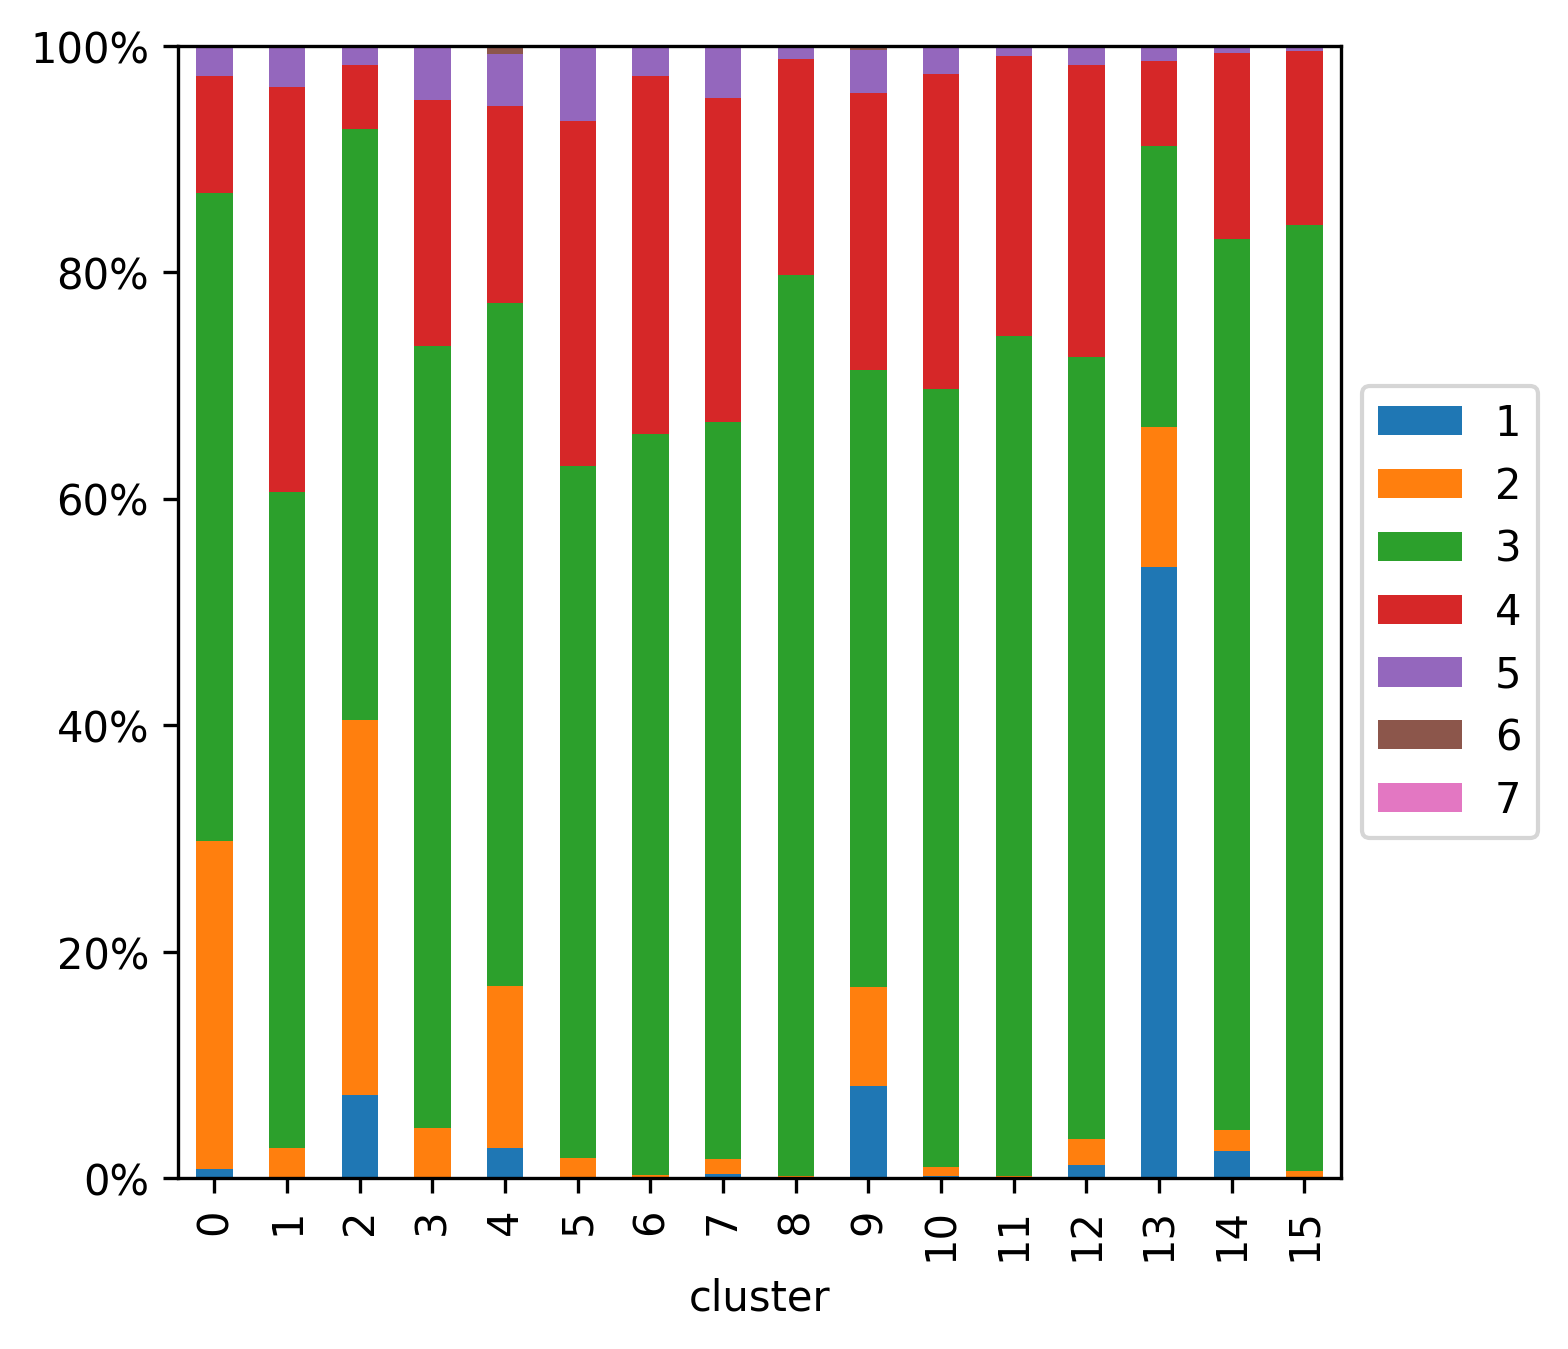

In [218]:
from matplotlib.ticker import PercentFormatter

fig = plt.figure(figsize=(5, 5), dpi=300)
ax = fig.gca()

pd.crosstab(df_clust.cluster, df_clust.Rooms, normalize="index").plot.bar(
    stacked=True, ax=ax
).legend(loc="center left", bbox_to_anchor=(1.0, 0.5))

ax.set_ylim(0, 1)
ax.yaxis.set_major_formatter(PercentFormatter(1))
fig.savefig("biclust_rooms.png", bbox_inches="tight", pad_inches=0)
fig.savefig("biclust_rooms.pdf", bbox_inches="tight", pad_inches=0)

대부분에서 침실 3개가 가장 많고 그 다음으로 침실 4개가 2위인 것이 일반적.

13번은 침실 1개가 가장 많음.

0, 2번은 침실 3개 다음으로 침실 2개가 뒤따름. (2위)

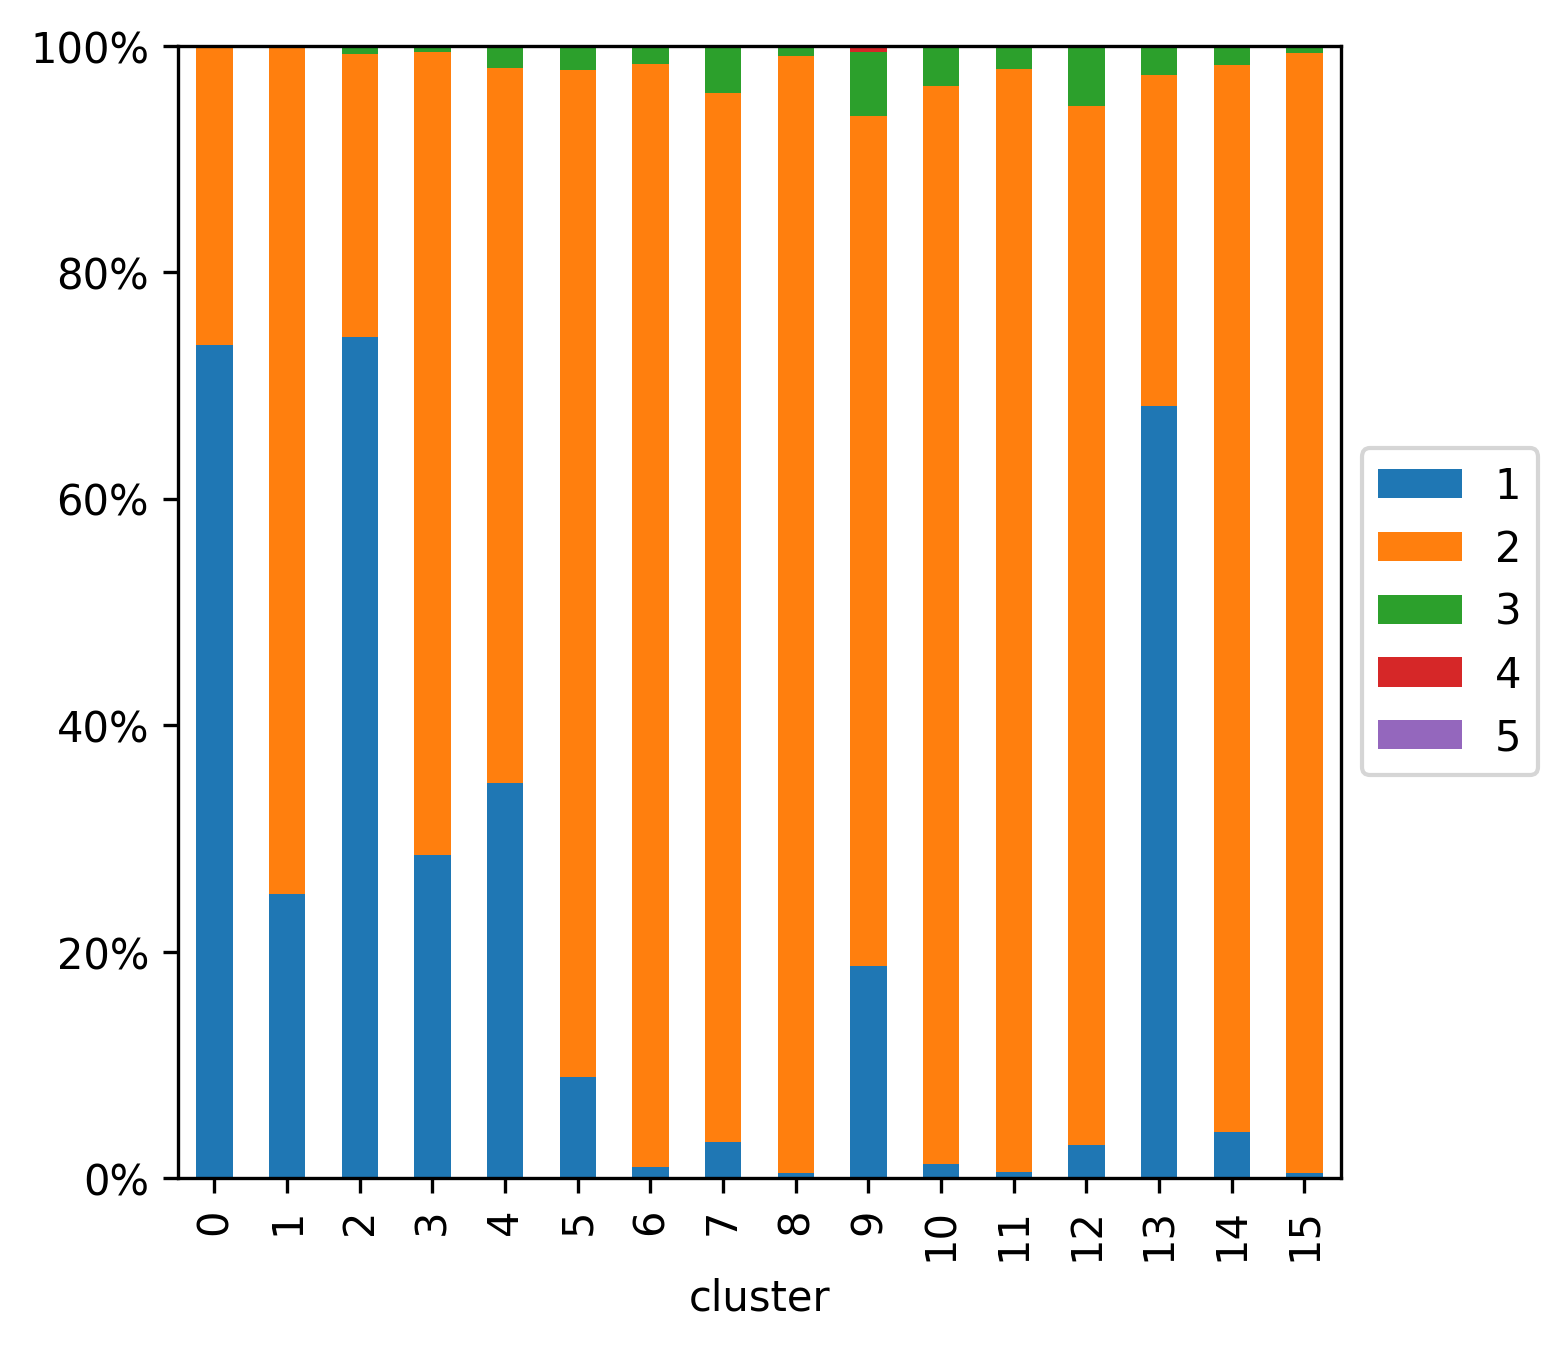

In [208]:
from matplotlib.ticker import PercentFormatter

fig = plt.figure(figsize=(5, 5), dpi=300)
ax = fig.gca()

pd.crosstab(df_clust.cluster, df_clust.Baths, normalize="index").plot.bar(
    stacked=True, ax=ax
).legend(loc="center left", bbox_to_anchor=(1.0, 0.5))

ax.set_ylim(0, 1)
ax.yaxis.set_major_formatter(PercentFormatter(1))
fig.savefig("biclust_baths.png", bbox_inches="tight", pad_inches=0)
fig.savefig("biclust_baths.pdf", bbox_inches="tight", pad_inches=0)

대체로 화장실 2개가 가장 많지만,
침실 1개가 가장 많은 13번과
침실 2개가 2위인 0, 2번은
화장실 1개가 가장 많음.

In [174]:
cmap = plt.get_cmap("tab20")
colors = cmap(np.linspace(0, 0.5 - 1 / cmap.N, cmap.N // 2))
colors

array([[0.12156863, 0.46666667, 0.70588235, 1.        ],
       [0.68235294, 0.78039216, 0.90980392, 1.        ],
       [1.        , 0.49803922, 0.05490196, 1.        ],
       [1.        , 0.73333333, 0.47058824, 1.        ],
       [0.17254902, 0.62745098, 0.17254902, 1.        ],
       [0.59607843, 0.8745098 , 0.54117647, 1.        ],
       [0.83921569, 0.15294118, 0.15686275, 1.        ],
       [1.        , 0.59607843, 0.58823529, 1.        ],
       [0.58039216, 0.40392157, 0.74117647, 1.        ],
       [0.77254902, 0.69019608, 0.83529412, 1.        ]])

In [175]:
from matplotlib.colors import LinearSegmentedColormap

tab20half = LinearSegmentedColormap.from_list("tab20 Lower Half", colors)

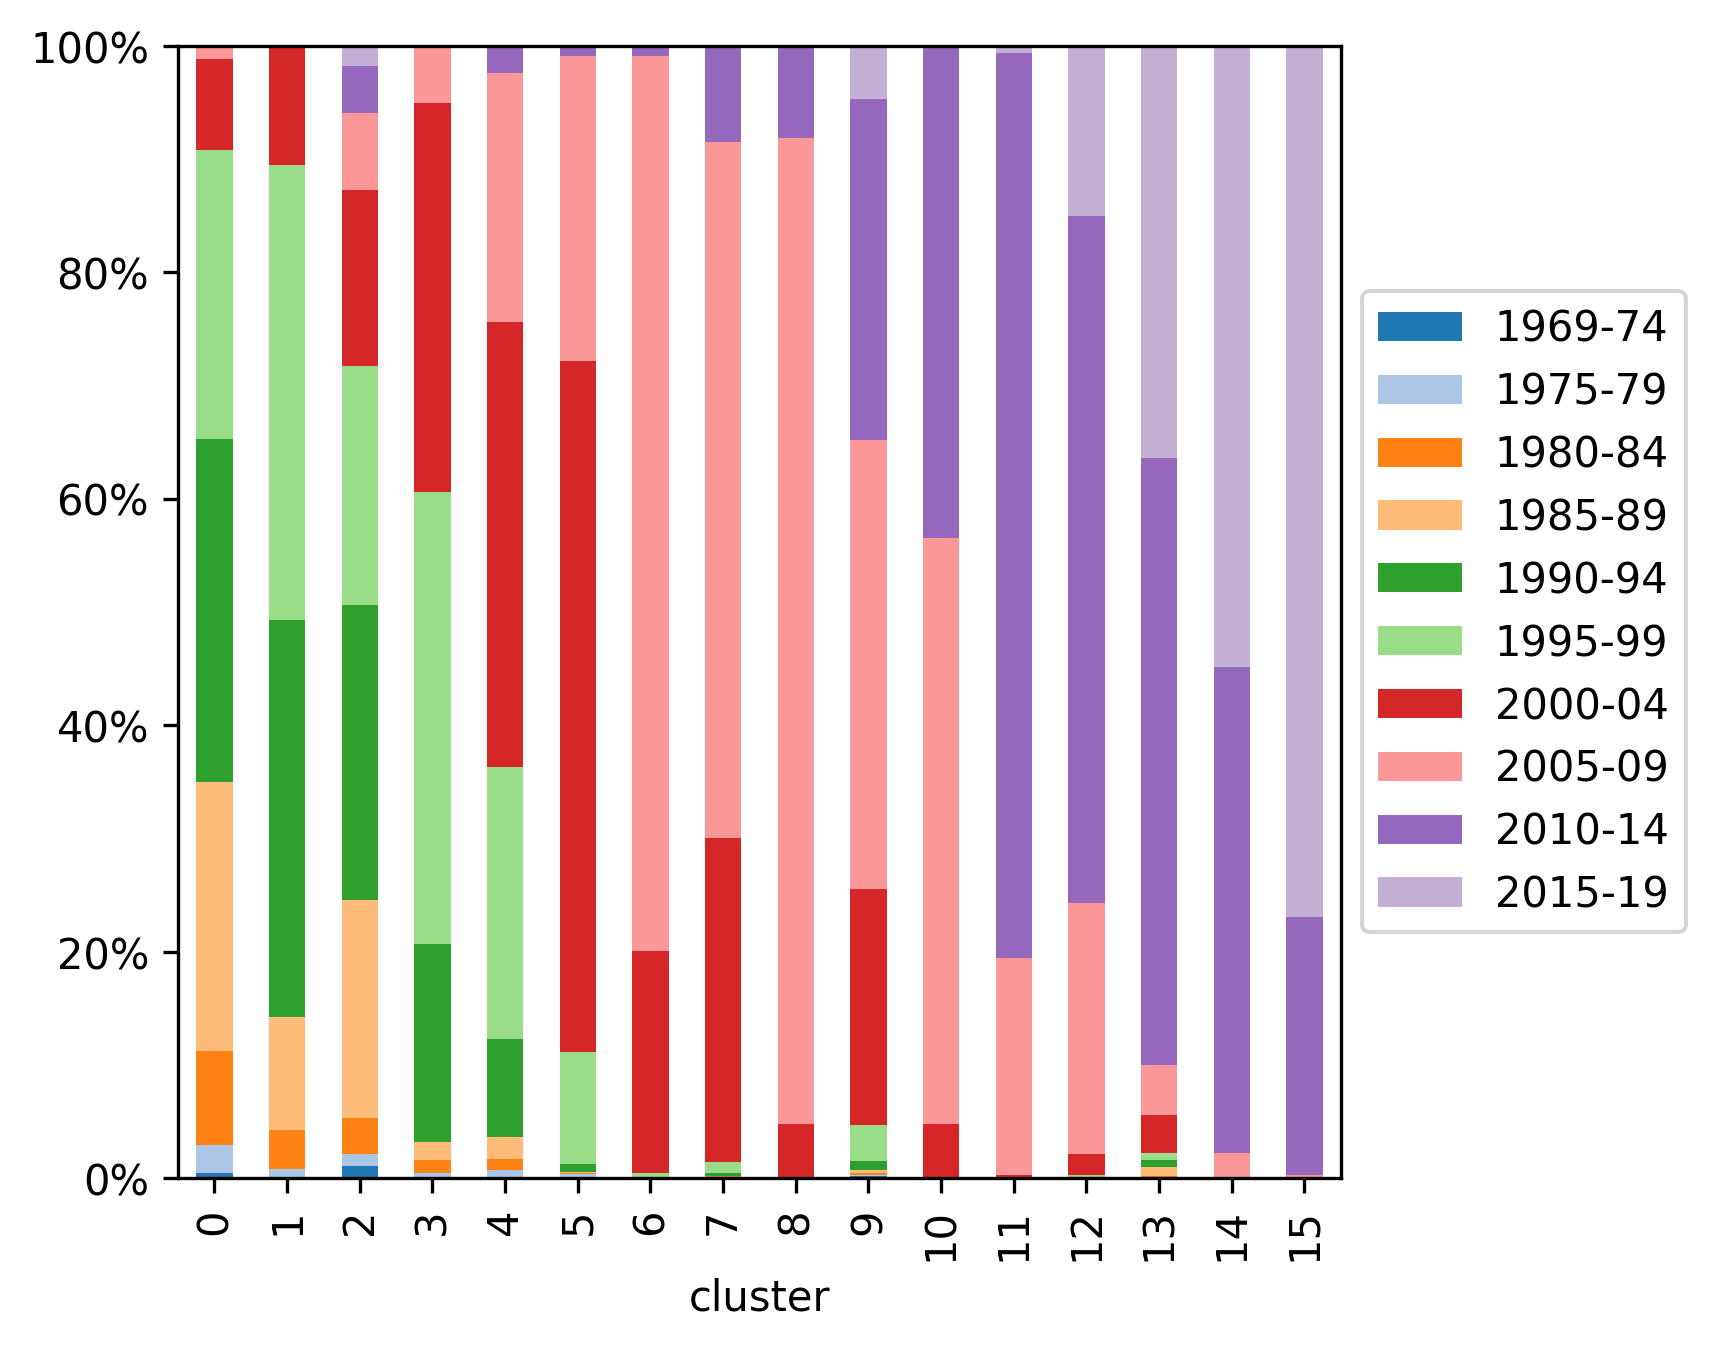

In [194]:
from matplotlib.ticker import PercentFormatter

fig = plt.figure(figsize=(5, 5), dpi=300)
ax = fig.gca()

pd.crosstab(df_clust.cluster, df_clust.true, normalize="index").plot.bar(
    stacked=True, cmap=tab20half, ax=ax
).legend(
    [
        "1969-74",
        "1975-79",
        "1980-84",
        "1985-89",
        "1990-94",
        "1995-99",
        "2000-04",
        "2005-09",
        "2010-14",
        "2015-19",
    ],
    loc="center left",
    bbox_to_anchor=(1.0, 0.5),
)

ax.set_ylim(0, 1)
ax.yaxis.set_major_formatter(PercentFormatter(1))
fig.savefig("biclust_year.png", bbox_inches="tight", pad_inches=0)
fig.savefig("biclust_year.pdf", bbox_inches="tight", pad_inches=0)

각 군집은 다양한 시기에 걸쳐 나타나지만,
여러 군집을 서로 비교하면 서로 다른 게 보임

(다시 써야 함)

In [215]:
tab20_sido = LinearSegmentedColormap.from_list(
    "9 colors from tab20",
    plt.get_cmap("tab20")([0, 0.05, 0.10, 0.15, 0.20, 0.30, 0.35, 0.40, 0.50]),
)

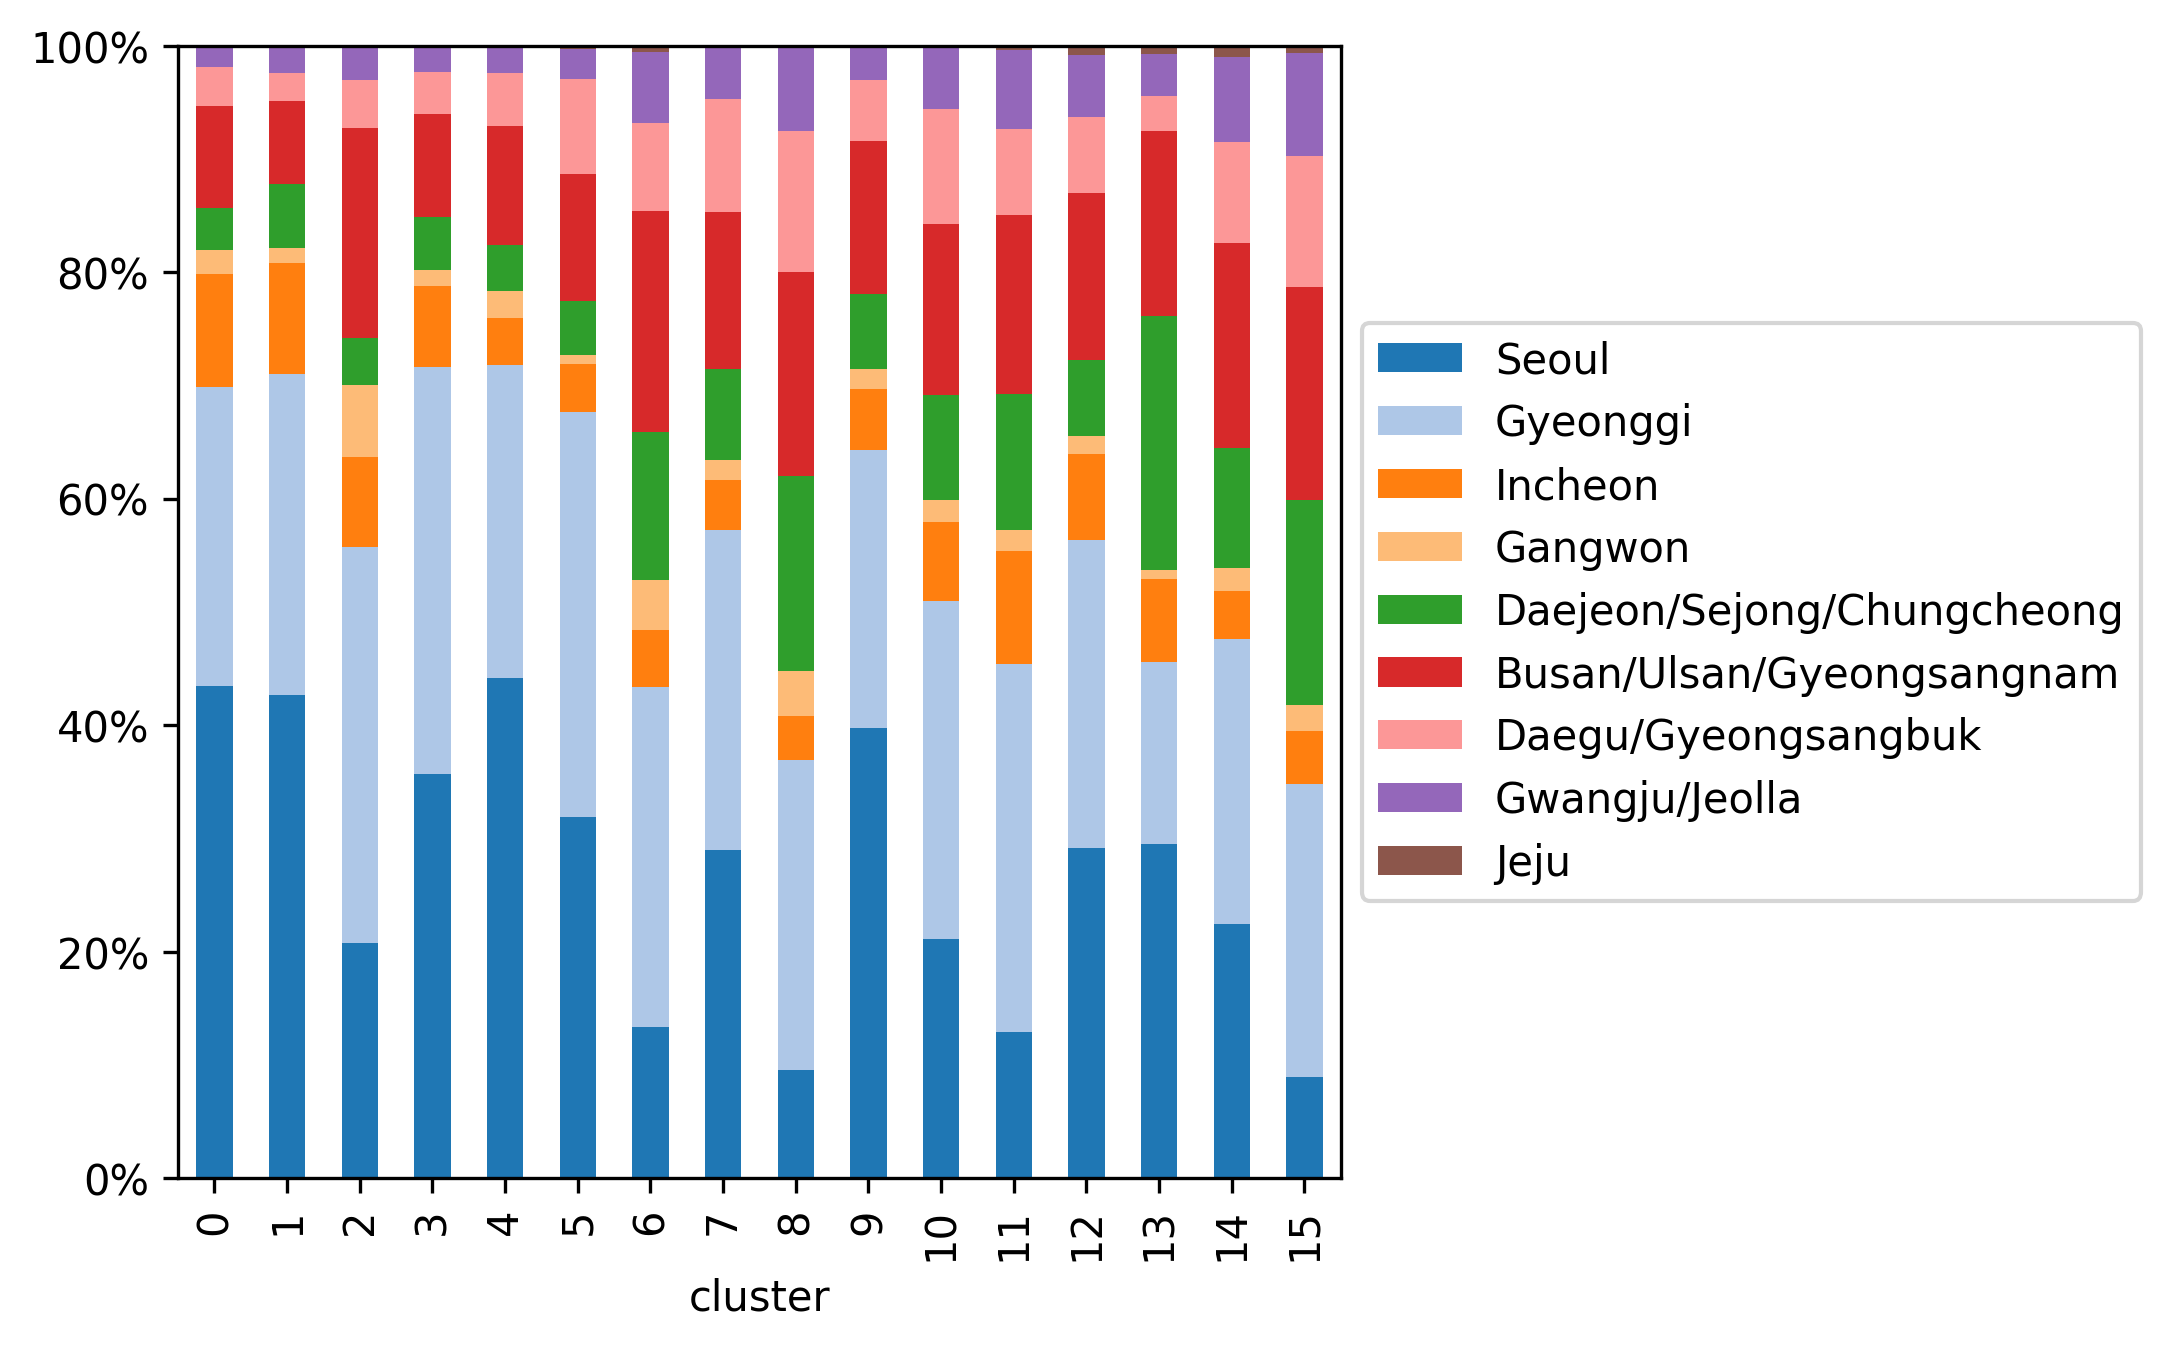

In [216]:
from matplotlib.ticker import PercentFormatter

fig = plt.figure(figsize=(5, 5), dpi=300)
ax = fig.gca()

pd.crosstab(df_clust.cluster, df_clust.sido_cluster_code, normalize="index").plot.bar(
    stacked=True, ax=ax, cmap=tab20_sido,
).legend(
    [
        "Seoul",
        "Gyeonggi",
        "Incheon",
        "Gangwon",
        "Daejeon/Sejong/Chungcheong",
        "Busan/Ulsan/Gyeongsangnam",
        "Daegu/Gyeongsangbuk",
        "Gwangju/Jeolla",
        "Jeju",
    ],
    loc="center left",
    bbox_to_anchor=(1.0, 0.5),
)

ax.set_ylim(0, 1)
ax.yaxis.set_major_formatter(PercentFormatter(1))
fig.savefig("biclust_sido.png", bbox_inches="tight", pad_inches=0)
fig.savefig("biclust_sido.pdf", bbox_inches="tight", pad_inches=0)

In [203]:
df_clust.Area

0        134.30
1        153.80
2        170.32
3        168.42
4         35.64
          ...  
50247     14.50
50248     21.57
50249     24.86
50250     25.67
50251     25.21
Name: Area, Length: 50252, dtype: float64

In [207]:
pd.cut(df_clust.Area, [0, 50, 60, 85, np.inf])

0        (85.0, inf]
1        (85.0, inf]
2        (85.0, inf]
3        (85.0, inf]
4        (0.0, 50.0]
            ...     
50247    (0.0, 50.0]
50248    (0.0, 50.0]
50249    (0.0, 50.0]
50250    (0.0, 50.0]
50251    (0.0, 50.0]
Name: Area, Length: 50252, dtype: category
Categories (4, interval[float64]): [(0.0, 50.0] < (50.0, 60.0] < (60.0, 85.0] < (85.0, inf]]

In [220]:
pd.crosstab(df_clust.cluster, pd.cut(df_clust.Area, [0, 50, 60, 85, np.inf]), normalize="index")

Area,"(0.0, 50.0]","(50.0, 60.0]","(60.0, 85.0]","(85.0, inf]"
cluster,,,,
0,0.171261,0.295752,0.366923,0.166064
1,0.005263,0.107018,0.462281,0.425439
2,0.329164,0.298552,0.282093,0.090191
3,0.012193,0.231230,0.450909,0.305668
4,0.086914,0.268997,0.355912,0.288177
5,0.001788,0.155579,0.407368,0.435265
6,0.000000,0.062473,0.491656,0.445871
7,0.001337,0.095187,0.455080,0.448396
8,0.000000,0.057416,0.636364,0.306220


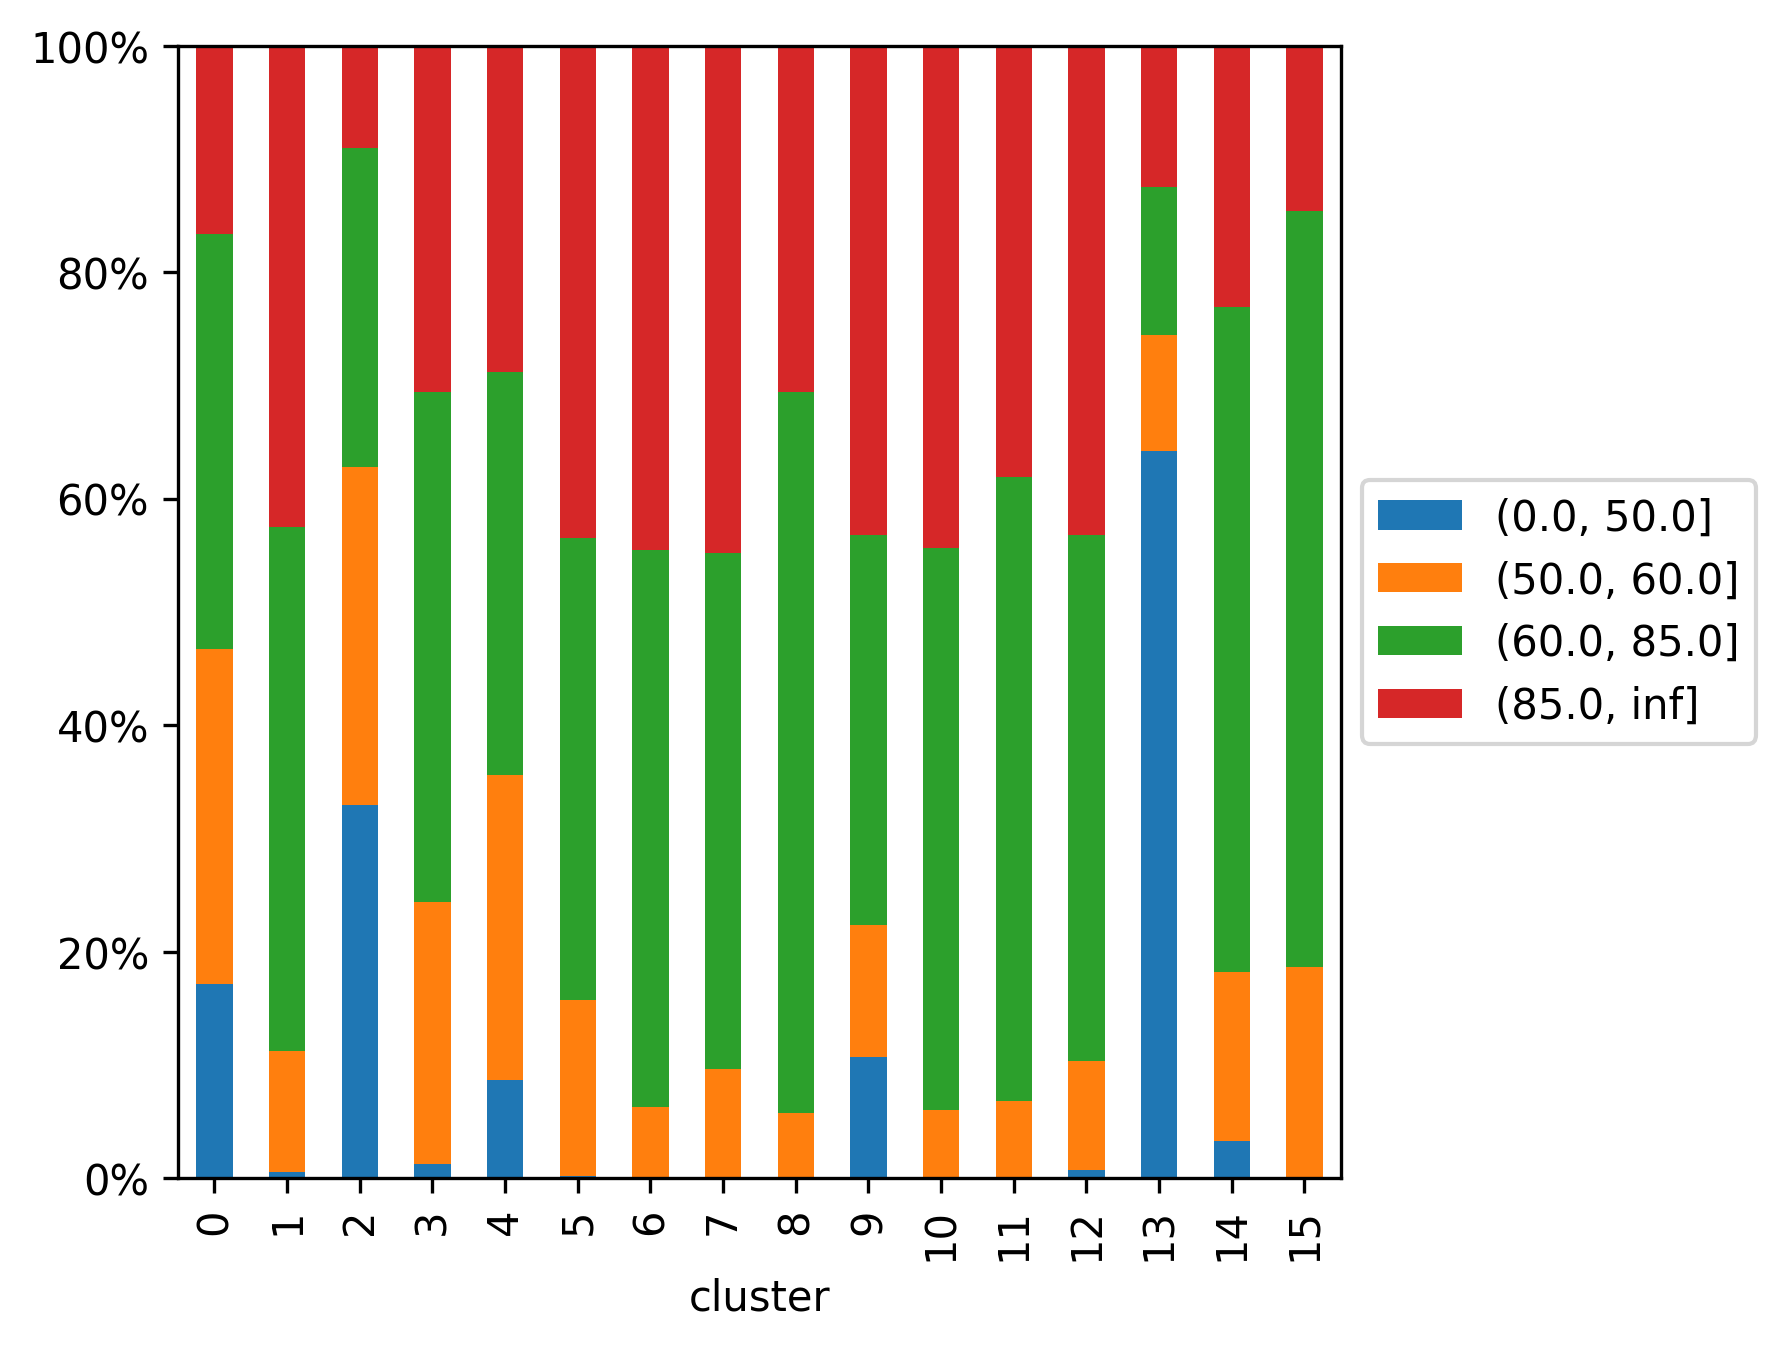

In [223]:
from matplotlib.ticker import PercentFormatter

fig = plt.figure(figsize=(5, 5), dpi=300)
ax = fig.gca()

pd.crosstab(df_clust.cluster, pd.cut(df_clust.Area, [0, 50, 60, 85, np.inf]), normalize="index").plot.bar(
    stacked=True, ax=ax
).legend(loc="center left", bbox_to_anchor=(1.0, 0.5))

ax.set_ylim(0, 1)
ax.yaxis.set_major_formatter(PercentFormatter(1))
fig.savefig("biclust_area.png", bbox_inches="tight", pad_inches=0)
fig.savefig("biclust_area.pdf", bbox_inches="tight", pad_inches=0)

면적

대다수는 국민주택 규모가 가장 많고 그 다음으로 대형 평면이 많음

0, 2, 13번은 소형 (60 이하)이 가장 많고, 5, 9번은 대형 (85 초과) 평면이 가장 많이 나타남

# 총평?

시기별로 잘 분류함

1990년대까지의 아파트 평면은 0--4번, 2000년대는 2--12번, 2010년대는 9--15번으로 중첩되어 나타남.
하나의 평면 유형이 여러 시기에 걸쳐 나타났다가 사라지는 모습을 보여줌.

대부분의 평면 유형에서 국민주택 규모와 그 이상의 대형 평면을 함께 포함함.
시기 구분과 관련없는 지역이나 면적 규모에 따른 차이는 잘 학습되지 않았음.

시기적으로 의미 있는 규모 변화는 잘 파악이 되었음.
13번은 원룸형 도시형생활주택 (2009년 처음 등장)을 잘 찾아냄.